<a href="https://colab.research.google.com/github/pabloroces/Coder_Trabajo_Final_Pablo_Roces/blob/main/Primer_Entrega_Pablo_Roces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introducción

Para el desarrollo del presente trabajo escogí un dataset que incluye un listado de canciones de la empresa Spotify.
Opté por este dataset debido a que siempre me intereso analizar si el éxito de una canción depende de alguna caracterísitca específica de la misma y ,por lo tanto, si se puede predecir el exito de una canción previa a su lanzamiento.


Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace:
https://www.kaggle.com/datasets/purumalgi/music-genre-classification?select=submission.csv

Este conjunto de datos proporciona información (danzabilidad, tonalidad, duración, popularidad, etc) sobre un listado de temas músicales.

Importación de Librerías y Carga de Datos

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/DATASET.xlsx')
df.head(15)


,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,Genero
0,Shubha Mudgal,Awakning Main Sutti,1.0,0.276,0.659,6.0,-6642.00,0,0.0352,0.002190,0.000044,0.1460,0.309,81611.00,6.236083e+09,4,0,Acoustic/Folk_0
1,Rhys Lewis,No Right To Love You - Acoustic,1.0,0.531,0.269,1.0,-10.60,1,0.0406,0.866000,NaN,0.1160,0.520,84186.00,3.825950e+05,4,0,Acoustic/Folk_0
2,Pastime,Samantha Crain,1.0,0.595,0.543,7.0,-5614.00,1,0.0232,0.164000,0.032400,0.1300,0.605,96043.00,3.457117e+09,4,0,Acoustic/Folk_0
3,Kodaline,All I Want,1.0,0.209,0.412,NaN,-9733.00,1,0.0443,0.172000,0.150000,0.0843,0.162,86.26,5.095783e+08,3,0,Acoustic/Folk_0
4,LCD Soundsystem,Drunk Girls - Holy Ghost! Remix,1.0,0.562,0.961,4.0,-7338.00,1,0.0617,0.004860,0.796000,0.1490,0.960,125036.00,4.505470e+05,4,1,Alt_Music_1
5,LCD Soundsystem,Drunk Girls,1.0,0.562,0.961,4.0,-7338.00,1,0.0617,0.004860,0.796000,0.1490,0.960,125036.00,4.505470e+05,4,1,Alt_Music_1
6,Pretty Sick,Bet My Blood,1.0,0.423,0.984,9.0,-4261.00,0,0.1000,0.000023,0.006760,0.3210,0.199,103218.00,1.797850e+05,4,1,Alt_Music_1
7,John Lee Hooker,Love Money Can't Buy,1.0,0.453,0.542,5.0,-7379.00,1,0.0391,0.975000,0.011000,0.0927,0.487,81921.00,1.563730e+05,4,2,Blues_2
8,Sonny Boy Williamson II,"Good Morning, Little Schoolgirl",1.0,0.668,0.133,NaN,-15.12,1,0.0689,0.986000,0.089900,0.1200,0.773,92243.00,1.807470e+05,4,2,Blues_2
9,The Midnighters,Sexy Ways,1.0,0.371,0.760,8.0,-2684.00,1,0.0418,0.411000,NaN,0.0732,0.907,128.74,1.475910e+05,4,2,Blues_2



Descripción del Dataset.

A continuación se encuentra una descripción de cada columna:

Artist Name : Nombre del artista vinculado a cada tema músical.

Track Name : Nombre del tema músical.

Popularity : Indica la popularidad de cada tema músical . Con valores del 1 al 100.

danceability: valor que indica qué tan apta es una canción para bailar. Este valor se basa en una combinación de elementos musicales como el tempo, la estabilidad rítmica, la intensidad del pulso y la regularidad general. Los valores de danceability van de 0.0 (la menos bailable) hasta 1.0 (la más bailable).

energy: Indica el nivel de energía de cada tema musical. Con valores del 0 al 1.

key : Indica el tono de cada tema. Con valores del 1 al 10.

loudness: medida de la sonoridad de una canción que tiene en cuenta la percepción humana y la intensidad de la señal eléctrica mode

speechiness:Indica la presencia de palabras habladas en el tema

acousticness : El acousticness de una canción es una medida de confianza que indica si la pista es acústica, en una escala de 0,0 a 1,0. Un valor de 1,0 indica una alta confianza de que la pista es acústica.

instrumentalness: indica la relación entre la parte instrumental y la vocal de la canción. Los temas que tienen voz e instrumentos suelen tener un valor de instrumentalness entre 0.0 y 0.1.

liveness: indica la presencia de público en la grabación. Los valores de liveness más altos indican que es más probable que la canción se haya interpretado en vivo

valence :es la configuración de los niveles de tonos agudos y bajos que se puede ajustar con el ecualizado tempo

duration_in min/ms: duración de la canción

time_signature:es una convención de notación que indica la cantidad de golpes que hay en cada barra o medida. El rango de la time signature va de 3 a 7, indicando "3/4" a "7/4"

Class: es un código que indica el genero de la canción.

Genero: es el nombre del genero de la canción.

In [ ]:
# contar el numero de valores que son 0 por columnas
import pandas as pd
import numpy as np
df = pd.read_excel('/content/DATASET.xlsx')
nun_missing = (df[['Artist Name','Track Name','Popularity','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','duration_in min/ms','time_signature','Class','Genero']] == 0).sum()
print(nun_missing)

Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                      0
loudness                 0
mode                  6191
speechiness              0
acousticness             3
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                  435
Genero                   0
dtype: int64


In [ ]:

# analizar cantidad de valores faltantes

print(df.isna().sum())

Artist Name              0
Track Name               0
Popularity               0
danceability             0
energy                   0
key                   1889
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4089
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
Genero                   0
dtype: int64


In [ ]:
# reemplazare los valores faltantes de la columna key por la media

df['key'].fillna(df['key'].mean(), inplace=True)
print(df.isna().sum())

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Genero                0
dtype: int64


<ipython-input-23-8cb3d1e8ad5d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['key'].fillna(df['key'].mean(), inplace=True)


In [ ]:
# reemplazare los valores faltantes de la columna instrumentalness por la media

df['instrumentalness'].fillna(df['instrumentalness'].mean(), inplace=True)
print(df.isna().sum())

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Genero                0
dtype: int64


<ipython-input-24-e9ecd911db12>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['instrumentalness'].fillna(df['instrumentalness'].mean(), inplace=True)


Exploración de Datos

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/DATASET.xlsx')
len(df)


16944

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/DATASET.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16944 entries, 0 to 16943
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         16944 non-null  object 
 1   Track Name          16944 non-null  object 
 2   Popularity          16944 non-null  float64
 3   danceability        16944 non-null  float64
 4   energy              16944 non-null  float64
 5   key                 15055 non-null  float64
 6   loudness            16944 non-null  float64
 7   mode                16944 non-null  int64  
 8   speechiness         16944 non-null  float64
 9   acousticness        16944 non-null  float64
 10  instrumentalness    12855 non-null  float64
 11  liveness            16944 non-null  float64
 12  valence             16944 non-null  float64
 13  tempo               16944 non-null  float64
 14  duration_in min/ms  16944 non-null  float64
 15  time_signature      16944 non-null  int64  
 16  Clas

In [ ]:
df.describe().round(1)

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,16944.0,16944.0,16944.0,15055.0,16944.0,16944.0,16944.0,16944.0,12855.0,16944.0,16944.0,16944.0,1.694400e+04,16944.0,16944.0
mean,44.6,0.5,0.7,6.0,-6957.0,0.6,0.1,0.2,0.2,0.2,0.5,110646.2,2.246274e+08,3.9,6.8
std,17.2,0.2,0.2,3.2,4289.2,0.5,0.1,0.3,0.3,0.2,0.2,46279.1,9.455123e+08,0.4,3.2
min,1.0,0.1,0.0,1.0,-36214.0,0.0,0.0,0.0,0.0,0.0,0.0,49.3,5.000000e-01,1.0,0.0
25%,33.0,0.4,0.5,3.0,-9041.0,0.0,0.0,0.0,0.0,0.1,0.3,92995.0,1.893330e+05,4.0,5.0
50%,44.0,0.5,0.7,6.0,-6512.5,1.0,0.0,0.1,0.0,0.1,0.5,116284.0,2.250000e+05,4.0,8.0
75%,56.0,0.7,0.9,9.0,-4540.2,1.0,0.1,0.4,0.2,0.3,0.7,139961.0,2.812880e+05,4.0,10.0
max,100.0,1.0,1.0,11.0,1355.0,1.0,1.0,1.0,1.0,1.0,1.0,217416.0,9.835333e+09,5.0,10.0


In [ ]:
df.Popularity.unique()

array([  1.,  10., 100.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,
        19.,   2.,  20.,  21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,
        29.,   3.,  30.,  31.,  32.,  33.,  34.,  35.,  36.,  37.,  38.,
        39.,   4.,  40.,  41.,  42.,  43.,  44.,  45.,  46.,  47.,  48.,
        49.,   5.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,  57.,  58.,
        59.,   6.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,  68.,
        69.,   7.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,   8.,  80.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
         9.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.])

In [ ]:
df.danceability.unique()


array([0.276 , 0.531 , 0.595 , 0.209 , 0.562 , 0.423 , 0.453 , 0.668 ,
       0.371 , 0.359 , 0.517 , 0.543 , 0.547 , 0.574 , 0.611 , 0.571 ,
       0.597 , 0.399 , 0.333 , 0.554 , 0.585 , 0.478 , 0.558 , 0.312 ,
       0.533 , 0.557 , 0.487 , 0.791 , 0.577 , 0.638 , 0.746 , 0.486 ,
       0.305 , 0.361 , 0.345 , 0.761 , 0.331 , 0.762 , 0.409 , 0.645 ,
       0.505 , 0.442 , 0.22  , 0.397 , 0.403 , 0.495 , 0.182 , 0.717 ,
       0.588 , 0.372 , 0.338 , 0.269 , 0.629 , 0.232 , 0.545 , 0.318 ,
       0.767 , 0.634 , 0.34  , 0.744 , 0.377 , 0.504 , 0.62  , 0.303 ,
       0.757 , 0.736 , 0.683 , 0.797 , 0.441 , 0.29  , 0.393 , 0.713 ,
       0.587 , 0.457 , 0.836 , 0.804 , 0.663 , 0.721 , 0.821 , 0.672 ,
       0.578 , 0.451 , 0.573 , 0.307 , 0.755 , 0.224 , 0.411 , 0.378 ,
       0.539 , 0.525 , 0.43  , 0.74  , 0.496 , 0.499 , 0.647 , 0.618 ,
       0.332 , 0.491 , 0.379 , 0.64  , 0.521 , 0.602 , 0.251 , 0.61  ,
       0.714 , 0.383 , 0.658 , 0.401 , 0.601 , 0.419 , 0.723 , 0.608 ,
      

In [ ]:
df.energy.unique()

array([0.659 , 0.269 , 0.543 , ..., 0.0666, 0.0828, 0.0993])

In [ ]:
df.key.unique()

array([ 6.,  1.,  7., nan,  4.,  9.,  5.,  8.,  2., 10., 11.,  3.])

In [ ]:
df.loudness.unique()

array([-6.6420e+03, -1.0600e+01, -5.6140e+03, ..., -1.4007e+04,
       -4.6450e+03, -4.4070e+03])

In [ ]:
df.speechiness.unique()

array([0.0352, 0.0406, 0.0232, ..., 0.457 , 0.42  , 0.476 ])

In [ ]:
df.acousticness.unique()

array([2.19e-03, 8.66e-01, 1.64e-01, ..., 3.84e-05, 6.32e-04, 7.60e-03])

In [ ]:
df.instrumentalness.unique()

array([4.40e-05,      nan, 3.24e-02, ..., 9.16e-04, 3.71e-02, 8.95e-05])

In [ ]:
df.liveness.unique()

array([0.146 , 0.116 , 0.13  , ..., 0.688 , 0.0391, 0.0215])

In [ ]:
df.valence.unique()

array([0.309 , 0.52  , 0.605 , ..., 0.0744, 0.0424, 0.0849])

In [ ]:


# Agrupar por género y calcular la media de popularidad, danzabilidad y duración
grouped_df = df.groupby('Genero').agg(
    {'Popularity': 'mean', 'danceability': 'mean', 'duration_in min/ms': 'mean'}
)

# Mostrar el resultado
grouped_df

,Popularity,danceability,duration_in min/ms
Genero,,,
Acoustic/Folk_0,40.126437,0.528269,1.698177e+09
Alt_Music_1,45.870052,0.535941,2.257621e+05
Blues_2,32.930677,0.561668,2.475473e+05
Bollywood_3,20.387560,0.486402,2.885239e+09
Country_4,56.713415,0.597473,2.120356e+09
HipHop_5,48.409894,0.727299,2.076408e+05
Indie Alt_6,41.460355,0.551306,2.293529e+05
Instrumental_7,43.815271,0.476383,2.597203e+09
Metal_8,42.223872,0.411438,2.716214e+05


Hipotesis Planteadas :

1) Los temas que son categorizados como Rock y Pop son los más populares.

2) Existe una relación directa entre Danzabilidad y Popularidad (cuanto mayor sea el indice de danzabilidad de un tema músical mayores chances existen de que sea popular).

3) Los temás musicales de menor duración son más populares


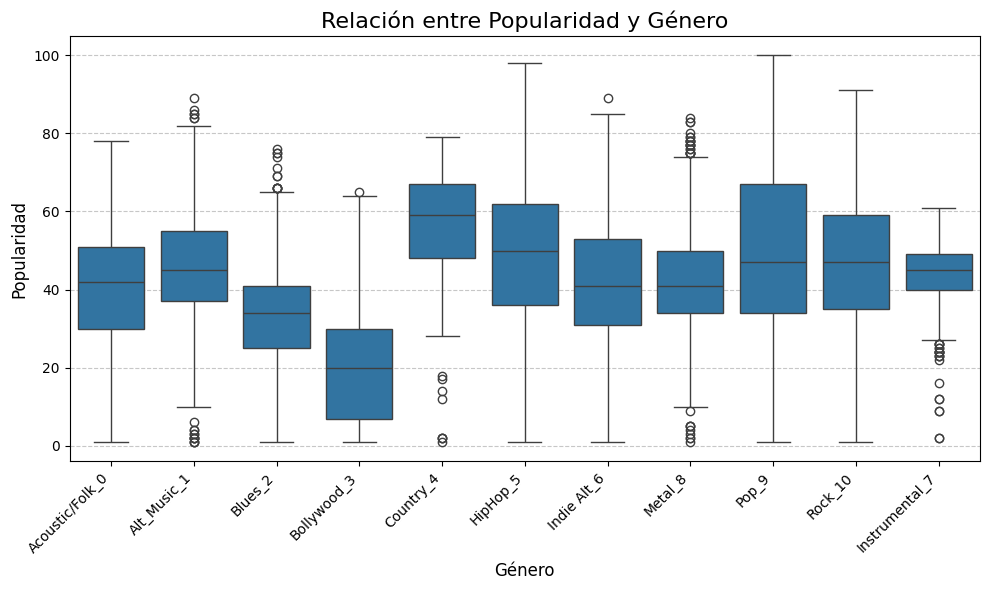

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura para mejor visibilidad
sns.boxplot(x='Genero', y='Popularity', data=df)
plt.title('Relación entre Popularidad y Género', fontsize=16) # Título más grande
plt.xlabel('Género', fontsize=12)  # Etiquetas de ejes más grandes
plt.ylabel('Popularidad', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar una cuadrícula sutil
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()

Popularidad por generos:

Acoustic/Folk y Indie Alt tienen una mediana de popularidad relativamente alta, lo que sugiere que, en promedio, las canciones de estos géneros son más populares.
Bollywood y Instrumental muestran medianas de popularidad más bajas, indicando que, en general, estos géneros son menos populares en comparación con otros.
Distribución de popularidad:

Géneros como Blues y Instrumental presentan más valores atípicos en la parte inferior, lo que indica que existen algunas canciones de muy baja popularidad en estos géneros.
En HipHop, el rango intercuartil es grande, lo que muestra una mayor variabilidad en la popularidad de las canciones dentro de este género. Esto podría sugerir que, aunque algunas canciones de HipHop son muy populares, otras no lo son tanto.
Outliers:

Algunos géneros, como Blues, Instrumental y Metal, tienen varios outliers hacia abajo, lo que sugiere que hay algunas canciones en estos géneros que son considerablemente menos populares que el resto.
Popularidad alta:

Géneros como Acoustic/Folk, Alt Music, y Pop presentan valores más altos de popularidad en general, con algunos valores cercanos a los 100 en estos géneros, indicando que estos estilos tienen algunas de las canciones más populares.

Acoustic/Folk e Indie Alt son los géneros más populares, mientras que Bollywood e Instrumental tienen menor popularidad. HipHop muestra alta variabilidad en popularidad. Blues, Instrumental y Metal presentan varios outliers hacia abajo. Pop y Alt Music incluyen canciones con popularidad muy alta.


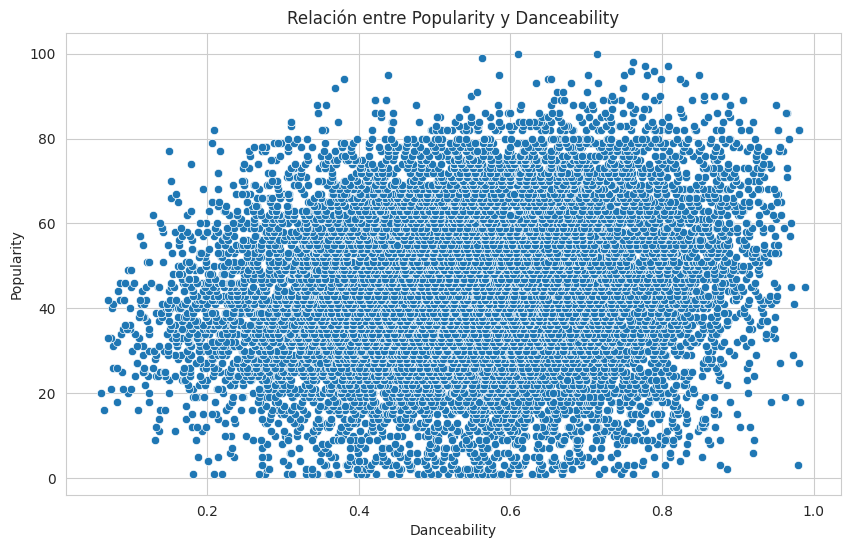

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el archivo Excel en un DataFrame
df = pd.read_excel('/content/DATASET.xlsx')

# Crear el gráfico de dispersión entre Popularity y danceability
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability', y='Popularity')
plt.title('Relación entre Popularity y Danceability')
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()



No es claro que exista una relación directa entre la Danzabilidad y Popularidad de un tema Músical.

In [ ]:
# Coeficiente correlación entre Danzabilidad y Popularidad

# Calculate the correlation coefficient
correlation_coefficient = df['danceability'].corr(df['Popularity'])

print(f"The correlation coefficient between danceability and popularity is: {correlation_coefficient}")

The correlation coefficient between danceability and popularity is: 0.15279677620679322


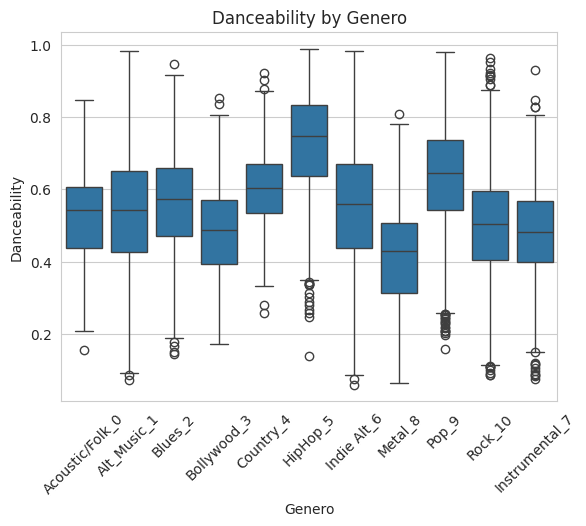

In [ ]:
import seaborn as sns

sns.boxplot(x='Genero', y='danceability', data=df)
plt.xlabel('Genero')
plt.ylabel('Danceability')
plt.title('Danceability by Genero')
plt.xticks(rotation=45)
plt.show()


El Rock y el Pop se encuentran entre los géneros que máyor nivel de popularidad poseen (analizando los promedios de la lista de canciones).
Se puede destacar que las canciones Country (Genero con alto nivel de popularidad) se encuentro entre los géneros con mayor nivel de danzabilidad

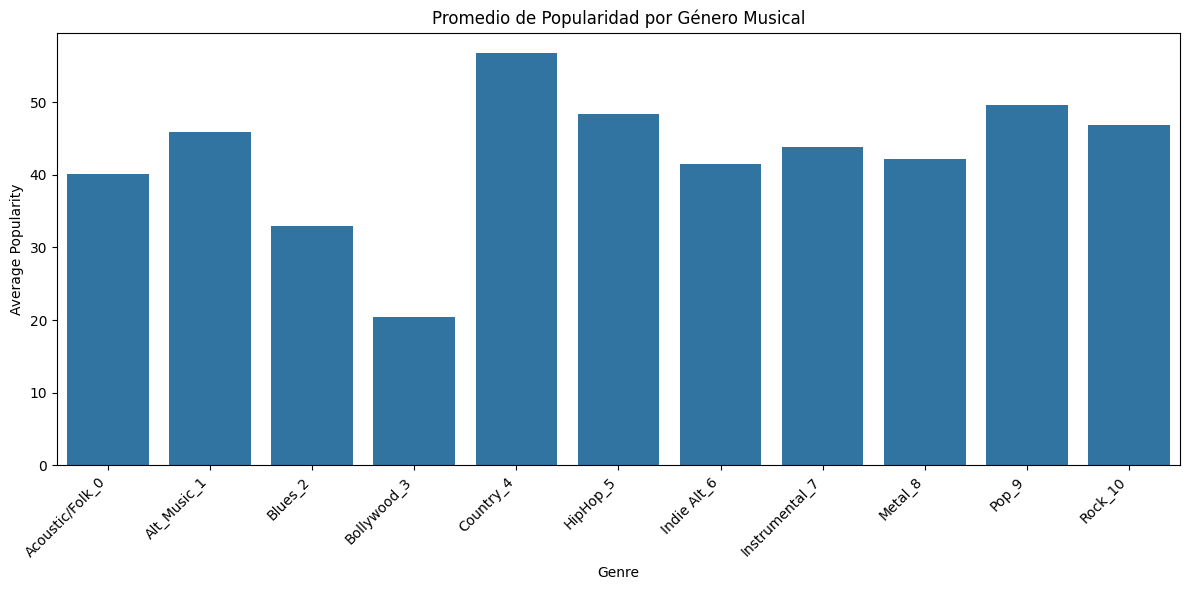

In [ ]:
# generar un barplot donde se pueda visualizar la popularidad promedio por genero

import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average popularity for each genre
average_popularity_by_genre = df.groupby('Genero')['Popularity'].mean()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=average_popularity_by_genre.index, y=average_popularity_by_genre.values)
plt.title('Promedio de Popularidad por Género Musical')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

El rock y el pop poseen una popularidad promedio alta en comparación con los demás géneros.
Se puede resaltar que la musica Contry posee la mayor popularidad promedio (en comparación con los demás géneros)

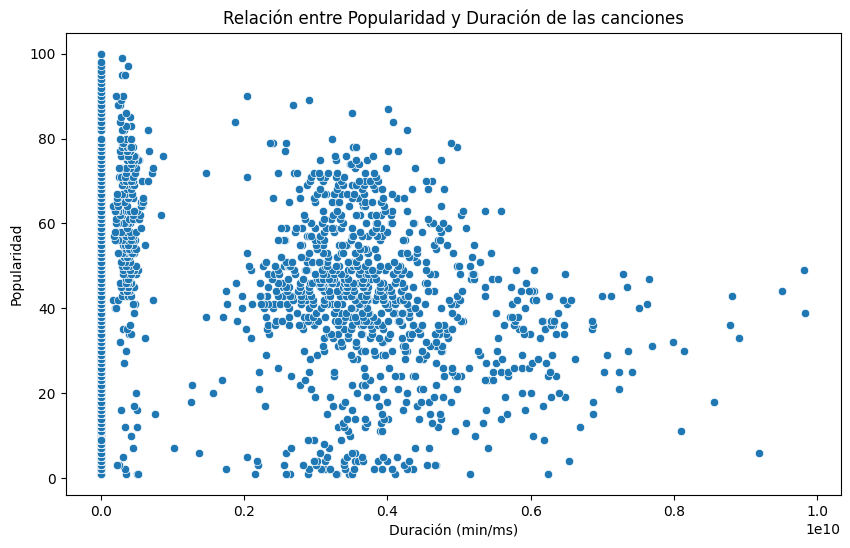

In [ ]:
# prompt: generar un diagrama de dispersión que relacione la popularidad con la duración de las canciones

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_in min/ms', y='Popularity')
plt.title('Relación entre Popularidad y Duración de las Canciones')
plt.xlabel('Duración (min/ms)')
plt.ylabel('Popularidad')
plt.show()

No se observa una relación directa entre popularidad y duración de las canciones.

In [ ]:
# Coeficiente de Correlación entre Popularidad y Duración de las canciones

# Calculate the correlation coefficient between popularity and duration
correlation_coefficient = df['Popularity'].corr(df['duration_in min/ms'])

print(f"The correlation coefficient between popularity and duration is: {correlation_coefficient}")

The correlation coefficient between popularity and duration is: -0.05362316466028071


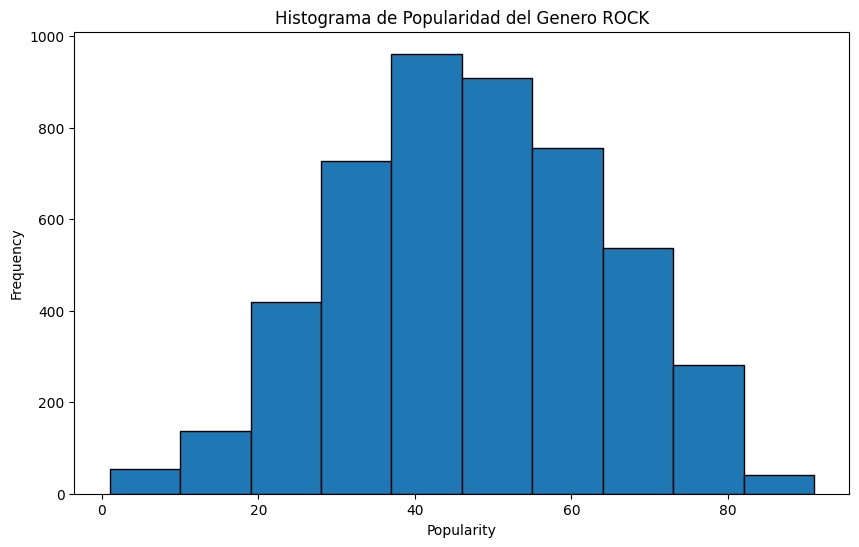

In [ ]:
# prompt: quiere hacer un histograma para analizar la columna popularity (solamente del Genero Rock_10)

# Filter the DataFrame for the 'Rock_10' genre
rock_10_df = df[df['Genero'] == 'Rock_10']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(rock_10_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histograma de Popularidad del Genero ROCK')
plt.show()

La mayoria de las canciones del género ROCK poseen una popularidad entre los 30 y 70 puntos

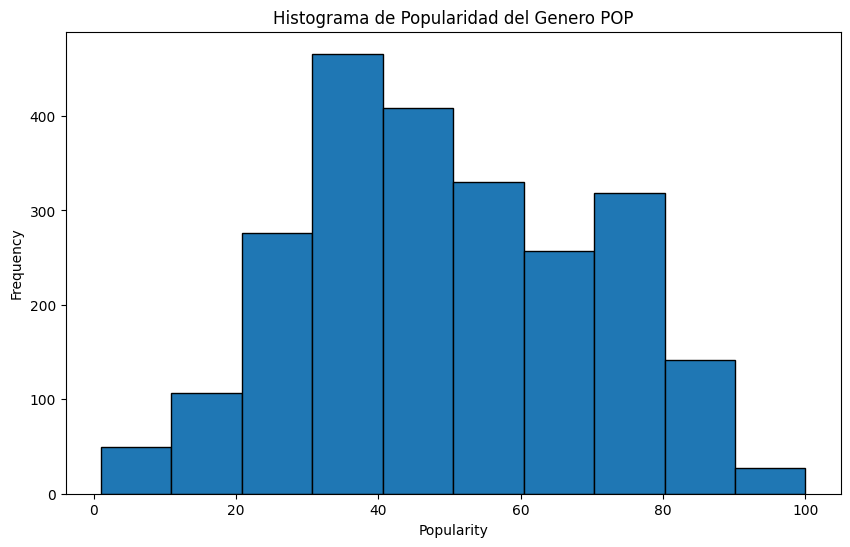

In [ ]:
# prompt: quisiera realizar un histograma para analizar la columna Popularity (solamente de las canciones del Genero Pop_9)

# Filter the DataFrame for the 'Pop_9' genre
pop_9_df = df[df['Genero'] == 'Pop_9']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(pop_9_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histograma de Popularidad del Genero POP')
plt.show()

La mayoria de las canciones del genero Pop poseen una popularidad en el rango de los 30 y 80 puntos.

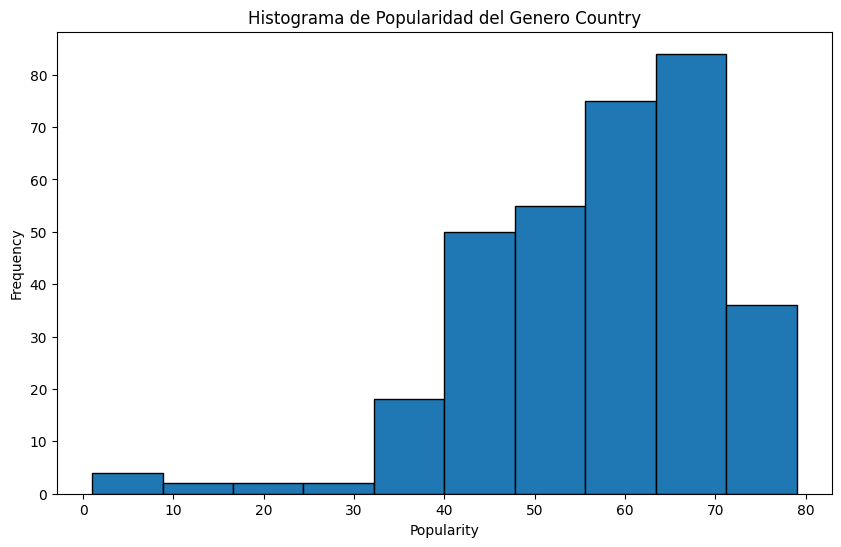

In [ ]:
# HISTOGRAMA PARA ANALIZAR LA POPULARIDAD DE LAS CANCIONES DEL GENERO COUNTRY

# Filter the DataFrame for the 'Country_4' genre
country_4_df = df[df['Genero'] == 'Country_4']

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(country_4_df['Popularity'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histograma de Popularidad del Genero Country')
plt.show()

La mayoría de las canciones del genero Contry poseen una popularidad mayor a los 50 puntos. Me sorprende esta conclusión pero debemos considerar que las canciones de country incluidas en el listado son pocas.

ANALISIS DE VALORES ATIPICOS DE LA COLUMNA POPULARITY

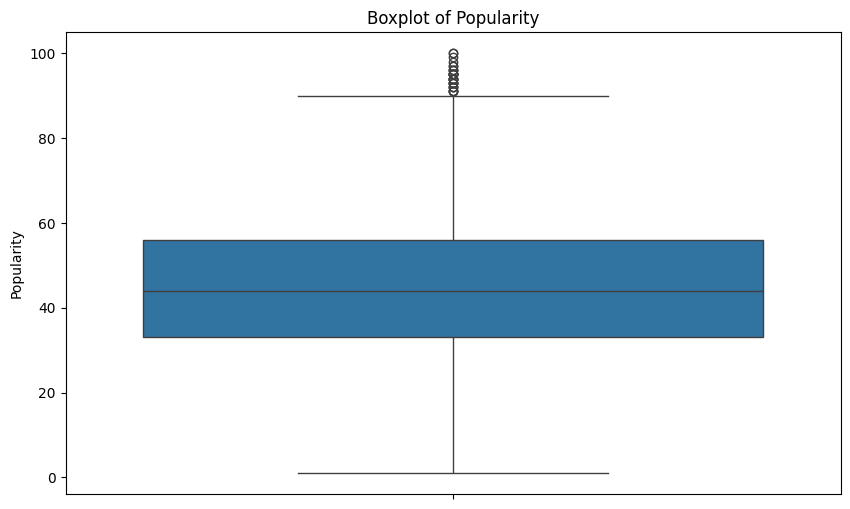

Outliers in Popularity:
           Artist Name                                         Track Name  \
115          Lil Nas X                     MONTERO (Call Me By Your Name)   
116          MÃ¥neskin                                            Beggin'   
16915    The Kid LAROI                                        WITHOUT YOU   
16916         24kGoldn                             Mood (feat. iann dior)   
16917              ATB                                    Your Love (9PM)   
16918   Olivia Rodrigo                                           good 4 u   
16919         Doja Cat                                            Streets   
16920         Doja Cat                                            Streets   
16921   Olivia Rodrigo                                     favorite crime   
16922       The Weeknd                                    Save Your Tears   
16923    Billie Eilish                                         Your Power   
16924  Sebastian Yatra                              

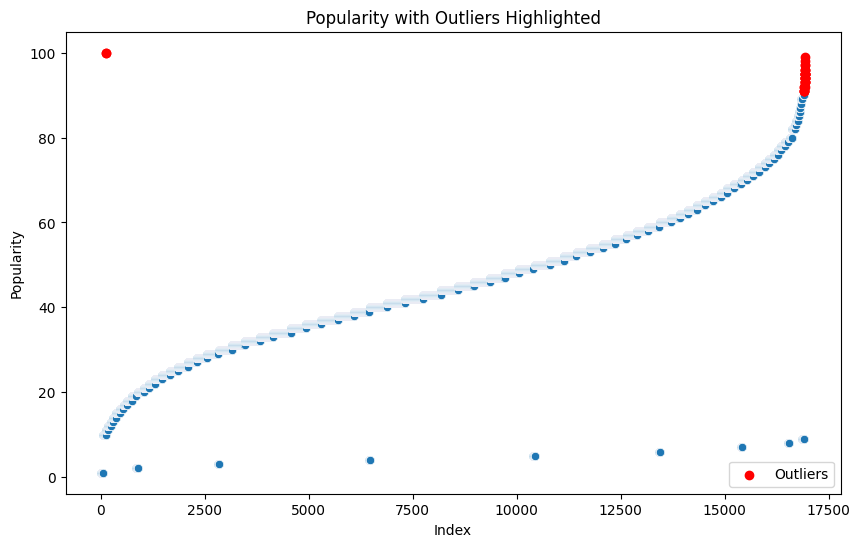

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the DataFrame (assuming it's already loaded as 'df')
# If not, load it here: df = pd.read_excel('/content/DATASET.xlsx')

# Analyze outliers in 'Popularity' column using a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Popularity'])
plt.title('Boxplot of Popularity')
plt.ylabel('Popularity')
plt.show()

# Calculate quartiles and IQR
Q1 = df['Popularity'].quantile(0.25)
Q3 = df['Popularity'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Popularity'] < lower_bound) | (df['Popularity'] > upper_bound)]

# Print or visualize outliers
print("Outliers in Popularity:")
print(outliers)

# Visualize outliers on a scatter plot (optional, for more context)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['Popularity'])
plt.scatter(outliers.index, outliers['Popularity'], color='red', label='Outliers')
plt.title('Popularity with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('Popularity')
plt.legend()
plt.show()



ANALISIS DE VALORES ATIPICOS (OUTLIERS) DE LA COLUMNA DANCEABILITY

Outliers in Danceability:
                       Artist Name                                Track Name  \
507                  Nekromantheon                                  Thanatos   
692                 Heretical Sect            The Depths of Weeping Infinity   
942                         Murcof                            Dividing Space   
1091                   Vous Autres                            Sans SâˆšÂ®ves   
1823                   Pale Saints  She Rides the Waves (John Peel Sessions)   
1962                    Robot Koch              Stars As Eyes - Hugar Rework   
1982                King of Asgard                             AmmobiâˆšÂ¶rg   
3323                     Sunn 0)))                                 Frost (C)   
3674                      Immortal        Unsilent Storms In The North Abyss   
3834                Bruce Brubaker             Opening - Laurel Halo Version   
4018                  Dark Funeral                            Open the Gates   
4329          

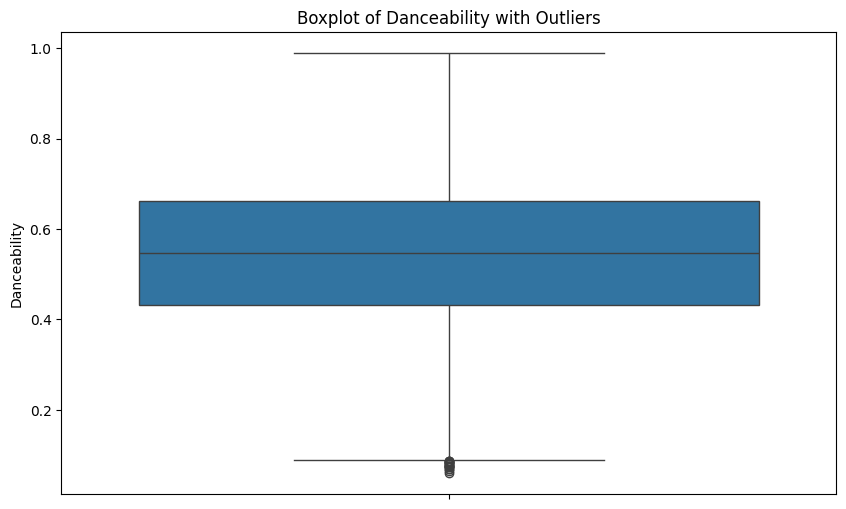

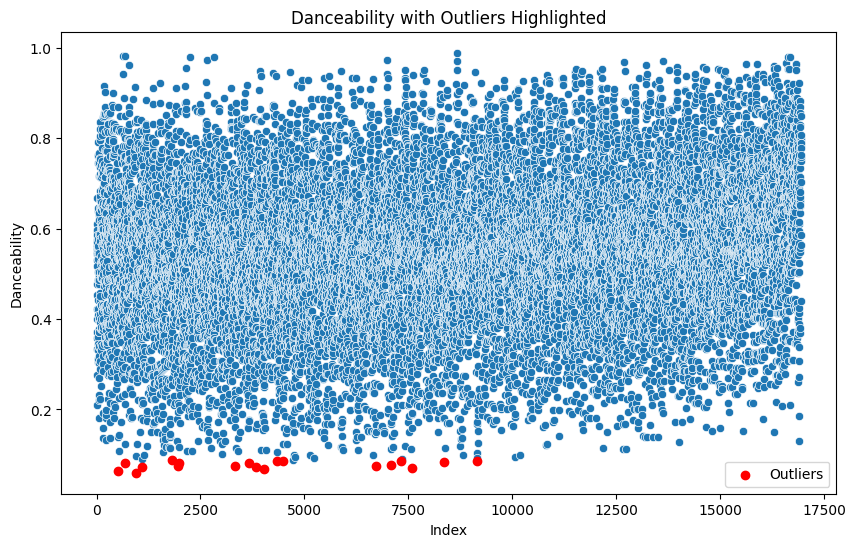

In [ ]:


# Calculate quartiles and IQR for 'danceability'
Q1_danceability = df['danceability'].quantile(0.25)
Q3_danceability = df['danceability'].quantile(0.75)
IQR_danceability = Q3_danceability - Q1_danceability

# Identify outliers based on the IQR method
lower_bound_danceability = Q1_danceability - 1.5 * IQR_danceability
upper_bound_danceability = Q3_danceability + 1.5 * IQR_danceability

danceability_outliers = df[(df['danceability'] < lower_bound_danceability) | (df['danceability'] > upper_bound_danceability)]

# Print or visualize outliers
print("Outliers in Danceability:")
print(danceability_outliers)

# Visualize outliers on a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['danceability'])
plt.title('Boxplot of Danceability with Outliers')
plt.ylabel('Danceability')
plt.show()

# Visualize outliers on a scatter plot (optional, for more context)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['danceability'])
plt.scatter(danceability_outliers.index, danceability_outliers['danceability'], color='red', label='Outliers')
plt.title('Danceability with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('Danceability')
plt.legend()
plt.show()

ANALISIS DE LOS VALORES ATÍPICOS (OUTLIERS) DE LA COLUMNA duration_in min/ms

Outliers in duration_in min/ms:
           Artist Name                       Track Name  Popularity  \
0        Shubha Mudgal              Awakning Main Sutti         1.0   
2              Pastime                   Samantha Crain         1.0   
3             Kodaline                       All I Want         1.0   
4      LCD Soundsystem  Drunk Girls - Holy Ghost! Remix         1.0   
5      LCD Soundsystem                      Drunk Girls         1.0   
...                ...                              ...         ...   
16932        MÃ¥neskin            I WANNA BE YOUR SLAVE        95.0   
16935   Rauw Alejandro                       Todo De Ti        95.0   
16938              BTS                           Butter        96.0   
16941       Ed Sheeran                       Bad Habits        97.0   
16943   Olivia Rodrigo                         good 4 u        99.0   

       danceability  energy       key  loudness  mode  speechiness  \
0             0.276   0.659   6.00000   -6642

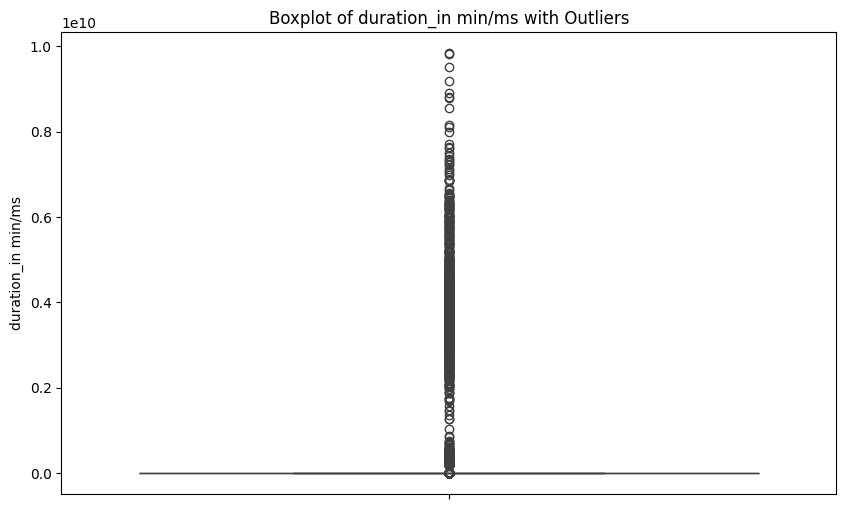

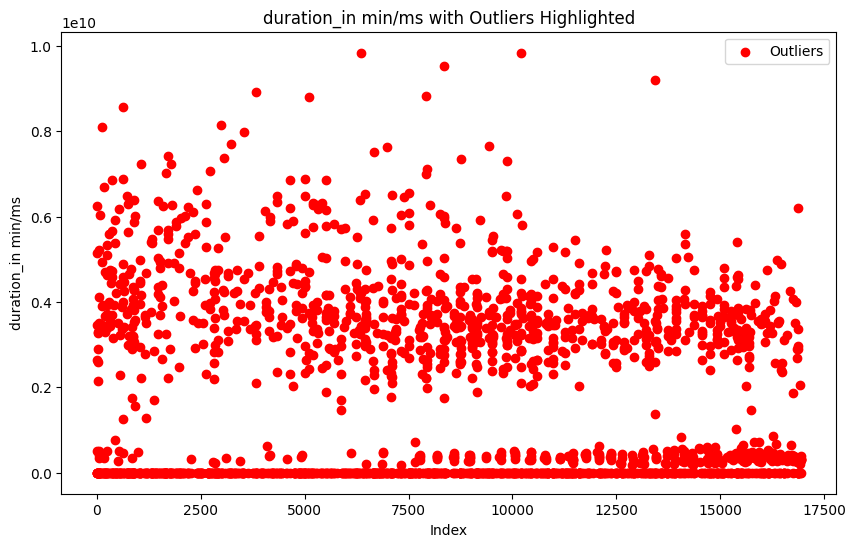

In [ ]:

# Calculate quartiles and IQR for 'duration_in min/ms'
Q1_duration = df['duration_in min/ms'].quantile(0.25)
Q3_duration = df['duration_in min/ms'].quantile(0.75)
IQR_duration = Q3_duration - Q1_duration

# Identify outliers based on the IQR method
lower_bound_duration = Q1_duration - 1.5 * IQR_duration
upper_bound_duration = Q3_duration + 1.5 * IQR_duration

duration_outliers = df[(df['duration_in min/ms'] < lower_bound_duration) | (df['duration_in min/ms'] > upper_bound_duration)]

# Print or visualize outliers
print("Outliers in duration_in min/ms:")
print(duration_outliers)

# Visualize outliers on a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['duration_in min/ms'])
plt.title('Boxplot of duration_in min/ms with Outliers')
plt.ylabel('duration_in min/ms')
plt.show()

# Visualize outliers on a scatter plot (optional, for more context)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.index, y=df['duration_in min/ms'])
plt.scatter(duration_outliers.index, duration_outliers['duration_in min/ms'], color='red', label='Outliers')
plt.title('duration_in min/ms with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('duration_in min/ms')
plt.legend()
plt.show()